# Ensembling
- si tratta di tecniche per ottenere una predizione da più modelli in cooperazione
- si distingue tra bagging e boosting
 - **bagging** : i modelli lavorano in parallelo
   - nel caso più semplice è un meccanismo di voto (moda nel classificatore e media nel regressore)
   - ogni modello viene addestrato su una parte dei dati di train (tutti dataset diversi!)
 - **boosting**: i modelli lavorano in serie

In [29]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

# dopo
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
X, y = fetch_olivetti_faces(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Bagging

#### Random Forest
- il metodo di ensembling più famoso
- consiste nel mettere a votazione una popolazione di alberi di decisione

In [22]:
model = RandomForestClassifier(n_estimators=50, max_depth=20, max_features=0.8, max_samples=0.5)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, max_samples=0.5,
                       n_estimators=50)

In [24]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
acc_train, acc_test

(1.0, 0.72)

In [25]:
model.estimators_[:3]

[DecisionTreeClassifier(max_depth=20, max_features=0.8, random_state=2023843116),
 DecisionTreeClassifier(max_depth=20, max_features=0.8, random_state=990880083),
 DecisionTreeClassifier(max_depth=20, max_features=0.8, random_state=1264160092)]

- **PRO**    : prestazioni maggiori, meno overffiting
- **CONTRO** : si ha a che fare con più modelli (meno interpretabile - vedi feature importance)

In [26]:
model.feature_importances_

array([0.00279527, 0.        , 0.        , ..., 0.00028359, 0.00124383,
       0.00208058])

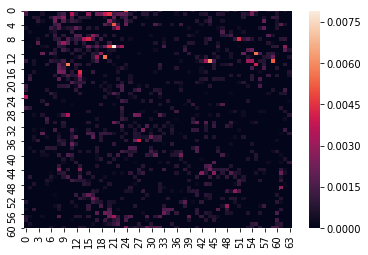

In [27]:
sns.heatmap( model.feature_importances_.reshape(64, 64) )

#### Custom bagging con il BaggingClassifier/BaggingRegressor
- permette di sfruttare il bagging con qualsiasi algoritmo di addestramento

In [8]:
model = BaggingClassifier( KNeighborsClassifier(), n_estimators=50, max_samples=0.8, max_features=0.8 )

In [9]:
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=50)

In [10]:
acc_train = model.score(X_train, y_train)
acc_test  = model.score(X_test, y_test)
acc_train, acc_test

(0.9233333333333333, 0.75)

In [11]:
model.base_estimator_

KNeighborsClassifier()

In [12]:
model.estimators_[:3]

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [13]:
model.estimators_samples_[:1]

[array([119, 104, 281, 288,  11,  72, 282, 232, 140, 231, 237,   8, 148,
         58, 119, 218, 286, 190,  43,  60, 104, 116, 262,  66, 288, 126,
        212, 155, 253,  17, 105, 128,  59, 145,  83, 223,  44, 123, 274,
        192,   6,  52, 276, 237, 268, 184, 288, 222, 215, 102, 204, 218,
         94, 246,  86,  17,  32, 130, 284, 237, 118,  10,   6, 294, 195,
        278,  11,  26, 147, 266,   5, 269, 124, 113,  83, 185,  65,  32,
        137, 114, 218,  97, 238,  44, 131, 222, 109,  97, 251,  25, 226,
        188, 219, 284, 266, 257, 268, 130, 251, 101,  92, 167, 242, 168,
        169,  42, 231,  12, 289, 205,  79, 266,  52, 135,  61, 124, 117,
        127, 195, 214,  17, 135,  27, 141,  24,  30, 187,  32, 285, 217,
          1,  12, 182, 165, 221, 207, 206,  45, 178, 233, 150, 192,  57,
        184, 211,  27,   3,  16, 153,  80, 215,  97, 296, 246, 127, 255,
        246, 171, 299, 137, 131, 209, 191,  25, 247, 197, 215, 117, 214,
        159, 293, 202,  45,  87, 128, 174,  40, 141

In [14]:
model.estimators_features_

[array([2700, 3027, 3727, ..., 2519, 2373, 2863]),
 array([1496, 1677, 3802, ...,  927, 1088, 1054]),
 array([2723, 3515, 3829, ..., 3826, 3469, 1506]),
 array([ 808, 2753, 3314, ..., 3743,  620, 3459]),
 array([1988, 3625,  951, ..., 2411, 3276, 1228]),
 array([ 868, 2167,  133, ..., 1074, 3390,  426]),
 array([2159, 1584, 2331, ...,  286, 1728, 3419]),
 array([3828, 4040, 1014, ..., 1161,   39, 1311]),
 array([1429, 3619,  641, ...,  767,  285,  514]),
 array([ 639,  873, 3057, ..., 2164, 1357, 3026]),
 array([1184, 1003, 1900, ..., 1574, 1694, 2148]),
 array([2703, 2441, 3067, ..., 1420, 3953,  355]),
 array([3515, 3521,  438, ..., 1052, 1405, 2583]),
 array([2242,  311, 2707, ..., 3458, 2790,  912]),
 array([2365, 3551, 2572, ..., 2344, 3008,   21]),
 array([ 461, 1559, 1565, ..., 3824,  775,  928]),
 array([2966,  746, 3535, ..., 1098,  533, 2342]),
 array([1029,  133, 2366, ..., 2625, 3603,  370]),
 array([3833, 2349, 1486, ..., 1865, 3077, 2727]),
 array([1785, 1157, 3278, ..., 